# Лабораторная работа 3.2.6. Исследование гальванометра.

In [8]:
import numpy as np
import pandas as pd
import smartlab as sl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## Теория

Рассчитаем ток по формуле
$$ I = U_0\dfrac{R_1}{R_2}\dfrac{1}{R+R_0} $$
Затем построим зависимость $I(x) = \dfrac{C_I}{2a}x$, откуда найдем динамическую постоянную
Найдем декремент затухания по формуле
$$ \Theta = \dfrac{1}{N}\ln{\dfrac{x_N}{x_0}} $$
Снимая зависимость декремента затухания от сопротивления найдем критическое сопротивление
$$ R_{кр}=\dfrac{1}{2\pi}\sqrt{\dfrac{d(R_0+R)^2}{d(\Theta^{-2})}}-R_0 $$

## Часть 1

Снимем показания вольтметра и делителя:
- $\alpha=\frac{R_1}{R_2}=\frac 1 {2000}$
- $R_0 = 580\ Ом$
- $2a = 2.2\ м$
- $R_2=10\ кОм$
- $U_0 = 1.34\ В$

Снимем зависимость отклонения зайчика от сопротивления

In [2]:
dataxR1 = pd.read_csv('dataxR1.tsv', delimiter='\t')
dataxR1['$I,\ нА$'] = round(1.34/2000/(580+dataxR1.iloc[:,1]*1000)*1e9, 1)
dataxR1['$\Delta I,\ нА$'] = round(0.1/dataxR1.iloc[:,1]*dataxR1['$I,\ нА$'], 1)
dataxR1

,"$x,\ см$","$R,\ кОм$","$I,\ нА$","$\Delta I,\ нА$"
0,25,5.1,118.0,2.3
1,23,5.6,108.4,1.9
2,21,6.2,98.8,1.6
3,19,6.9,89.6,1.3
4,17,7.7,80.9,1.1
5,15,8.8,71.4,0.8
6,13,10.3,61.6,0.6
7,11,12.1,52.8,0.4
8,9,14.9,43.3,0.3
9,7,19.3,33.7,0.2


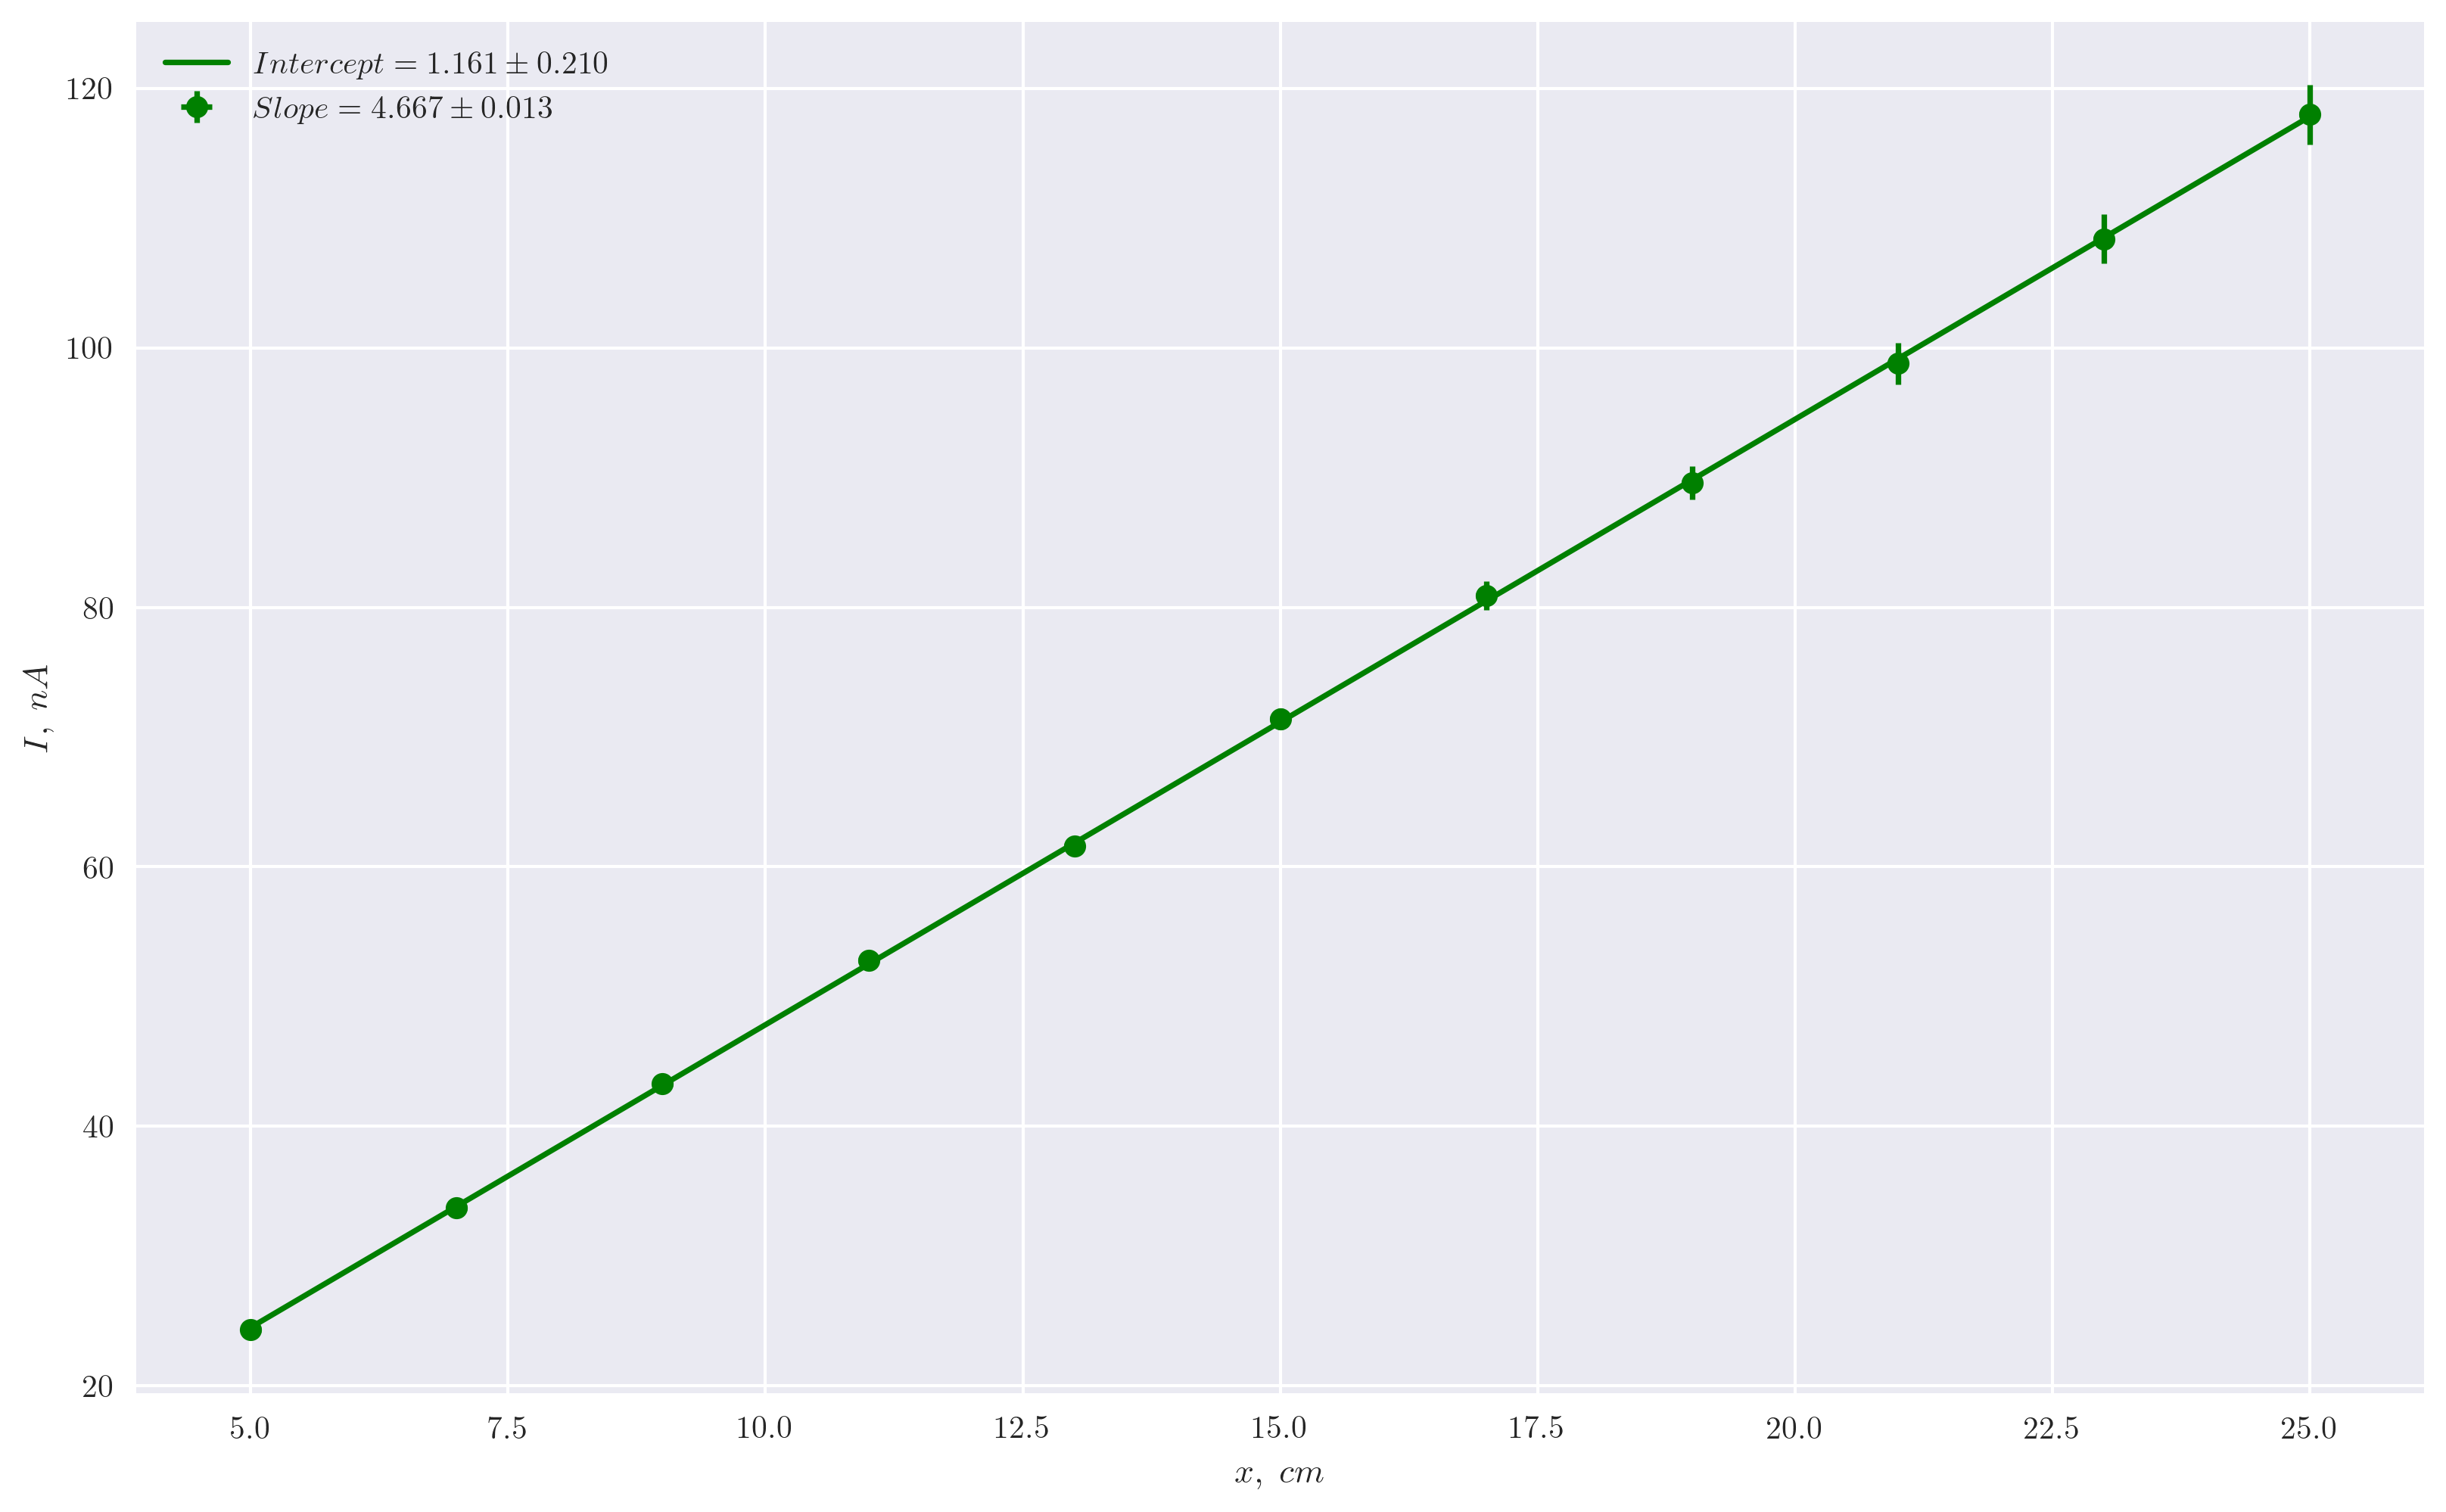

In [3]:
sl.linplot(dataxR1['$x,\ см$'], dataxR1['$I,\ нА$'], xerr=sl.abserror(0.1, dataxR1['$x,\ см$']),
          yerr=dataxR1['$\Delta I,\ нА$'], xlabel='$x,\ cm$', ylabel='$I,\ nA$')

Из графика угловой коэффициент $k=(4.67\pm0.01)\ \frac{нА}{см} \Rightarrow C_I=2ak=(10.27\pm0.03)\ \frac{нА}{см/м} = (1.027\pm0.003)\cdot 10^{-9}\ \frac{А}{мм/м}$

Запустим свободные колебания рамки и снимем зависимость отклонения зайчика в одну сторону от номера этого отклонения

In [4]:
dataxN = pd.read_csv('dataxN.tsv', delimiter='\t')
dataxN['$\ln{x}$'] = round(np.log(dataxN.iloc[:,0]), 2)
dataxN

,"$x,\ см$",$N$,$\ln{x}$
0,25.0,0,3.22
1,22.5,1,3.11
2,20.6,2,3.03
3,18.8,3,2.93
4,17.3,4,2.85
5,15.7,5,2.75
6,14.2,6,2.65
7,13.0,7,2.56


По ней рассчитаем логарифмический декремент затухания

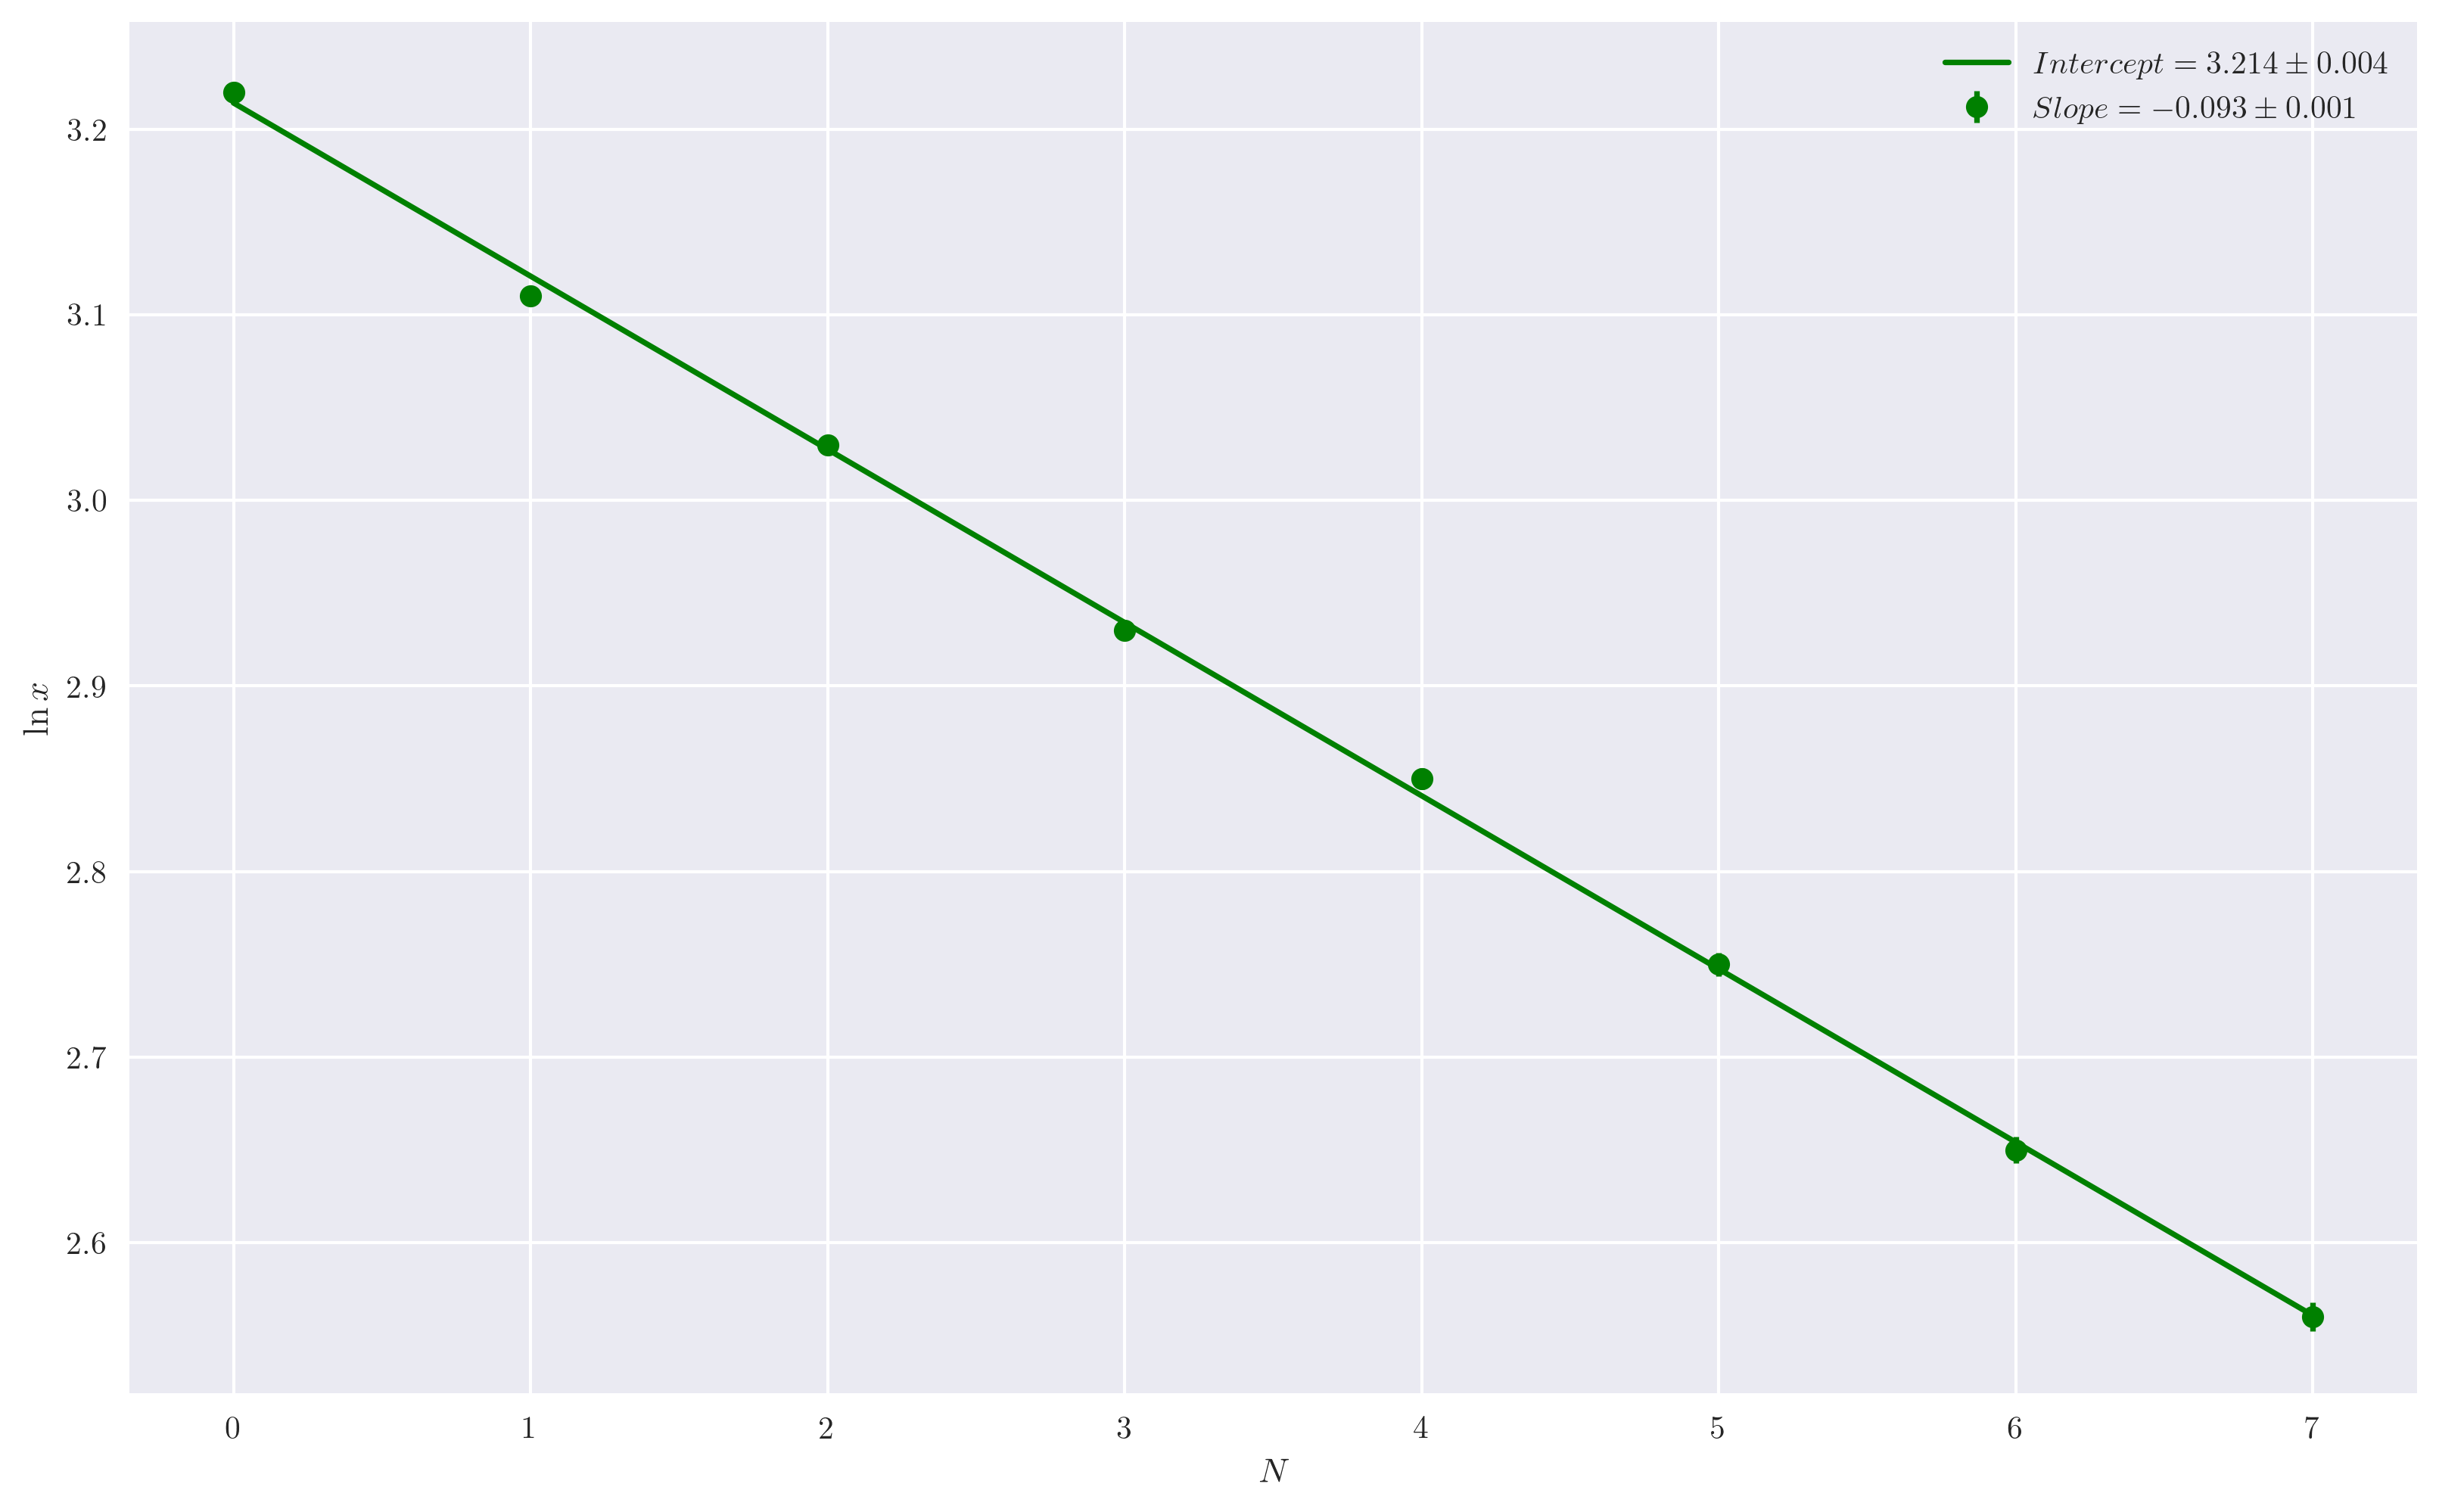

In [5]:
sl.linplot(dataxN.iloc[:,1], dataxN.iloc[:,2], 
           yerr=0.1/dataxN.iloc[:,0], xlabel='$N$', ylabel='$\ln{x}$')

Угловой коэффициент этого графика и есть логарифмический декремент затухания разомкнутого гальванометра со знаком минус: $\Theta_0=0.093\pm0.001$

- Период колебаний свободной рамки $T_0\approx 7\ с$
- Критическое сопротивление $R_{кр}=(3.5\pm0.5)\ Ом$

Будем запускать колебания рамки из начального положения $x_0$ и измерять первое и второе отклонение в одну сторону $x_1$ и $x_2$ соответственно

In [6]:
dataxR2 = pd.read_csv('dataxR2.tsv', delimiter='\t')
dataxR2['$\Theta$'] = round(np.log(dataxR2.iloc[:,1]/dataxR2.iloc[:,2]),2)
dataxR2['$\Theta_1$'] = round(np.log(dataxR2.iloc[:,2]/dataxR2.iloc[:,3]),2)
dataxR2['$(R+R_0)^2,\ кОм^2$'] = round((0.58+dataxR2.iloc[:,0])**2, 0)
dataxR2['$\Theta^{-2}$'] = round(1/(dataxR2['$\Theta$']**2), 2)
dataxR2['$\Delta\Theta^{-2}$'] = round(1/dataxR2.iloc[:,2]/dataxR2.iloc[:,4]*dataxR2.iloc[:,7], 2)
dataxR2['$\Delta(R+R_0)^2,\ кОм^2$'] = round(0.2*dataxR2.iloc[:,0])
dataxR2

,"$R,\ кОм$","$x_0,\ см$","$x_1,\ см$","$x_2,\ см$",$\Theta$,$\Theta_1$,"$(R+R_0)^2,\ кОм^2$",$\Theta^{-2}$,$\Delta\Theta^{-2}$,"$\Delta(R+R_0)^2,\ кОм^2$"
0,11.0,22.1,3.0,0.7,2.00,1.46,134.0,0.25,0.04,2.0
1,12.5,19.5,3.4,0.8,1.75,1.45,171.0,0.33,0.06,2.0
2,14.0,17.6,3.6,1.0,1.59,1.28,213.0,0.40,0.07,3.0
3,15.5,15.9,3.8,1.2,1.43,1.15,259.0,0.49,0.09,3.0
4,17.0,14.6,4.0,1.3,1.29,1.12,309.0,0.60,0.12,3.0
5,19.0,25.1,7.5,2.5,1.21,1.10,383.0,0.68,0.07,4.0
6,22.0,21.7,7.6,3.0,1.05,0.93,510.0,0.91,0.11,4.0
7,26.0,18.4,7.5,3.2,0.90,0.85,706.0,1.23,0.18,5.0
8,30.0,16.0,7.2,3.5,0.80,0.72,935.0,1.56,0.27,6.0
9,35.0,22.5,11.2,5.7,0.70,0.68,1266.0,2.04,0.26,7.0


$\Theta = \ln{x_0/x_1};\quad \Theta_1 = \ln{x_1/x_2}$

Построим линеаризованный график и по нему найдем критическое сопротивление

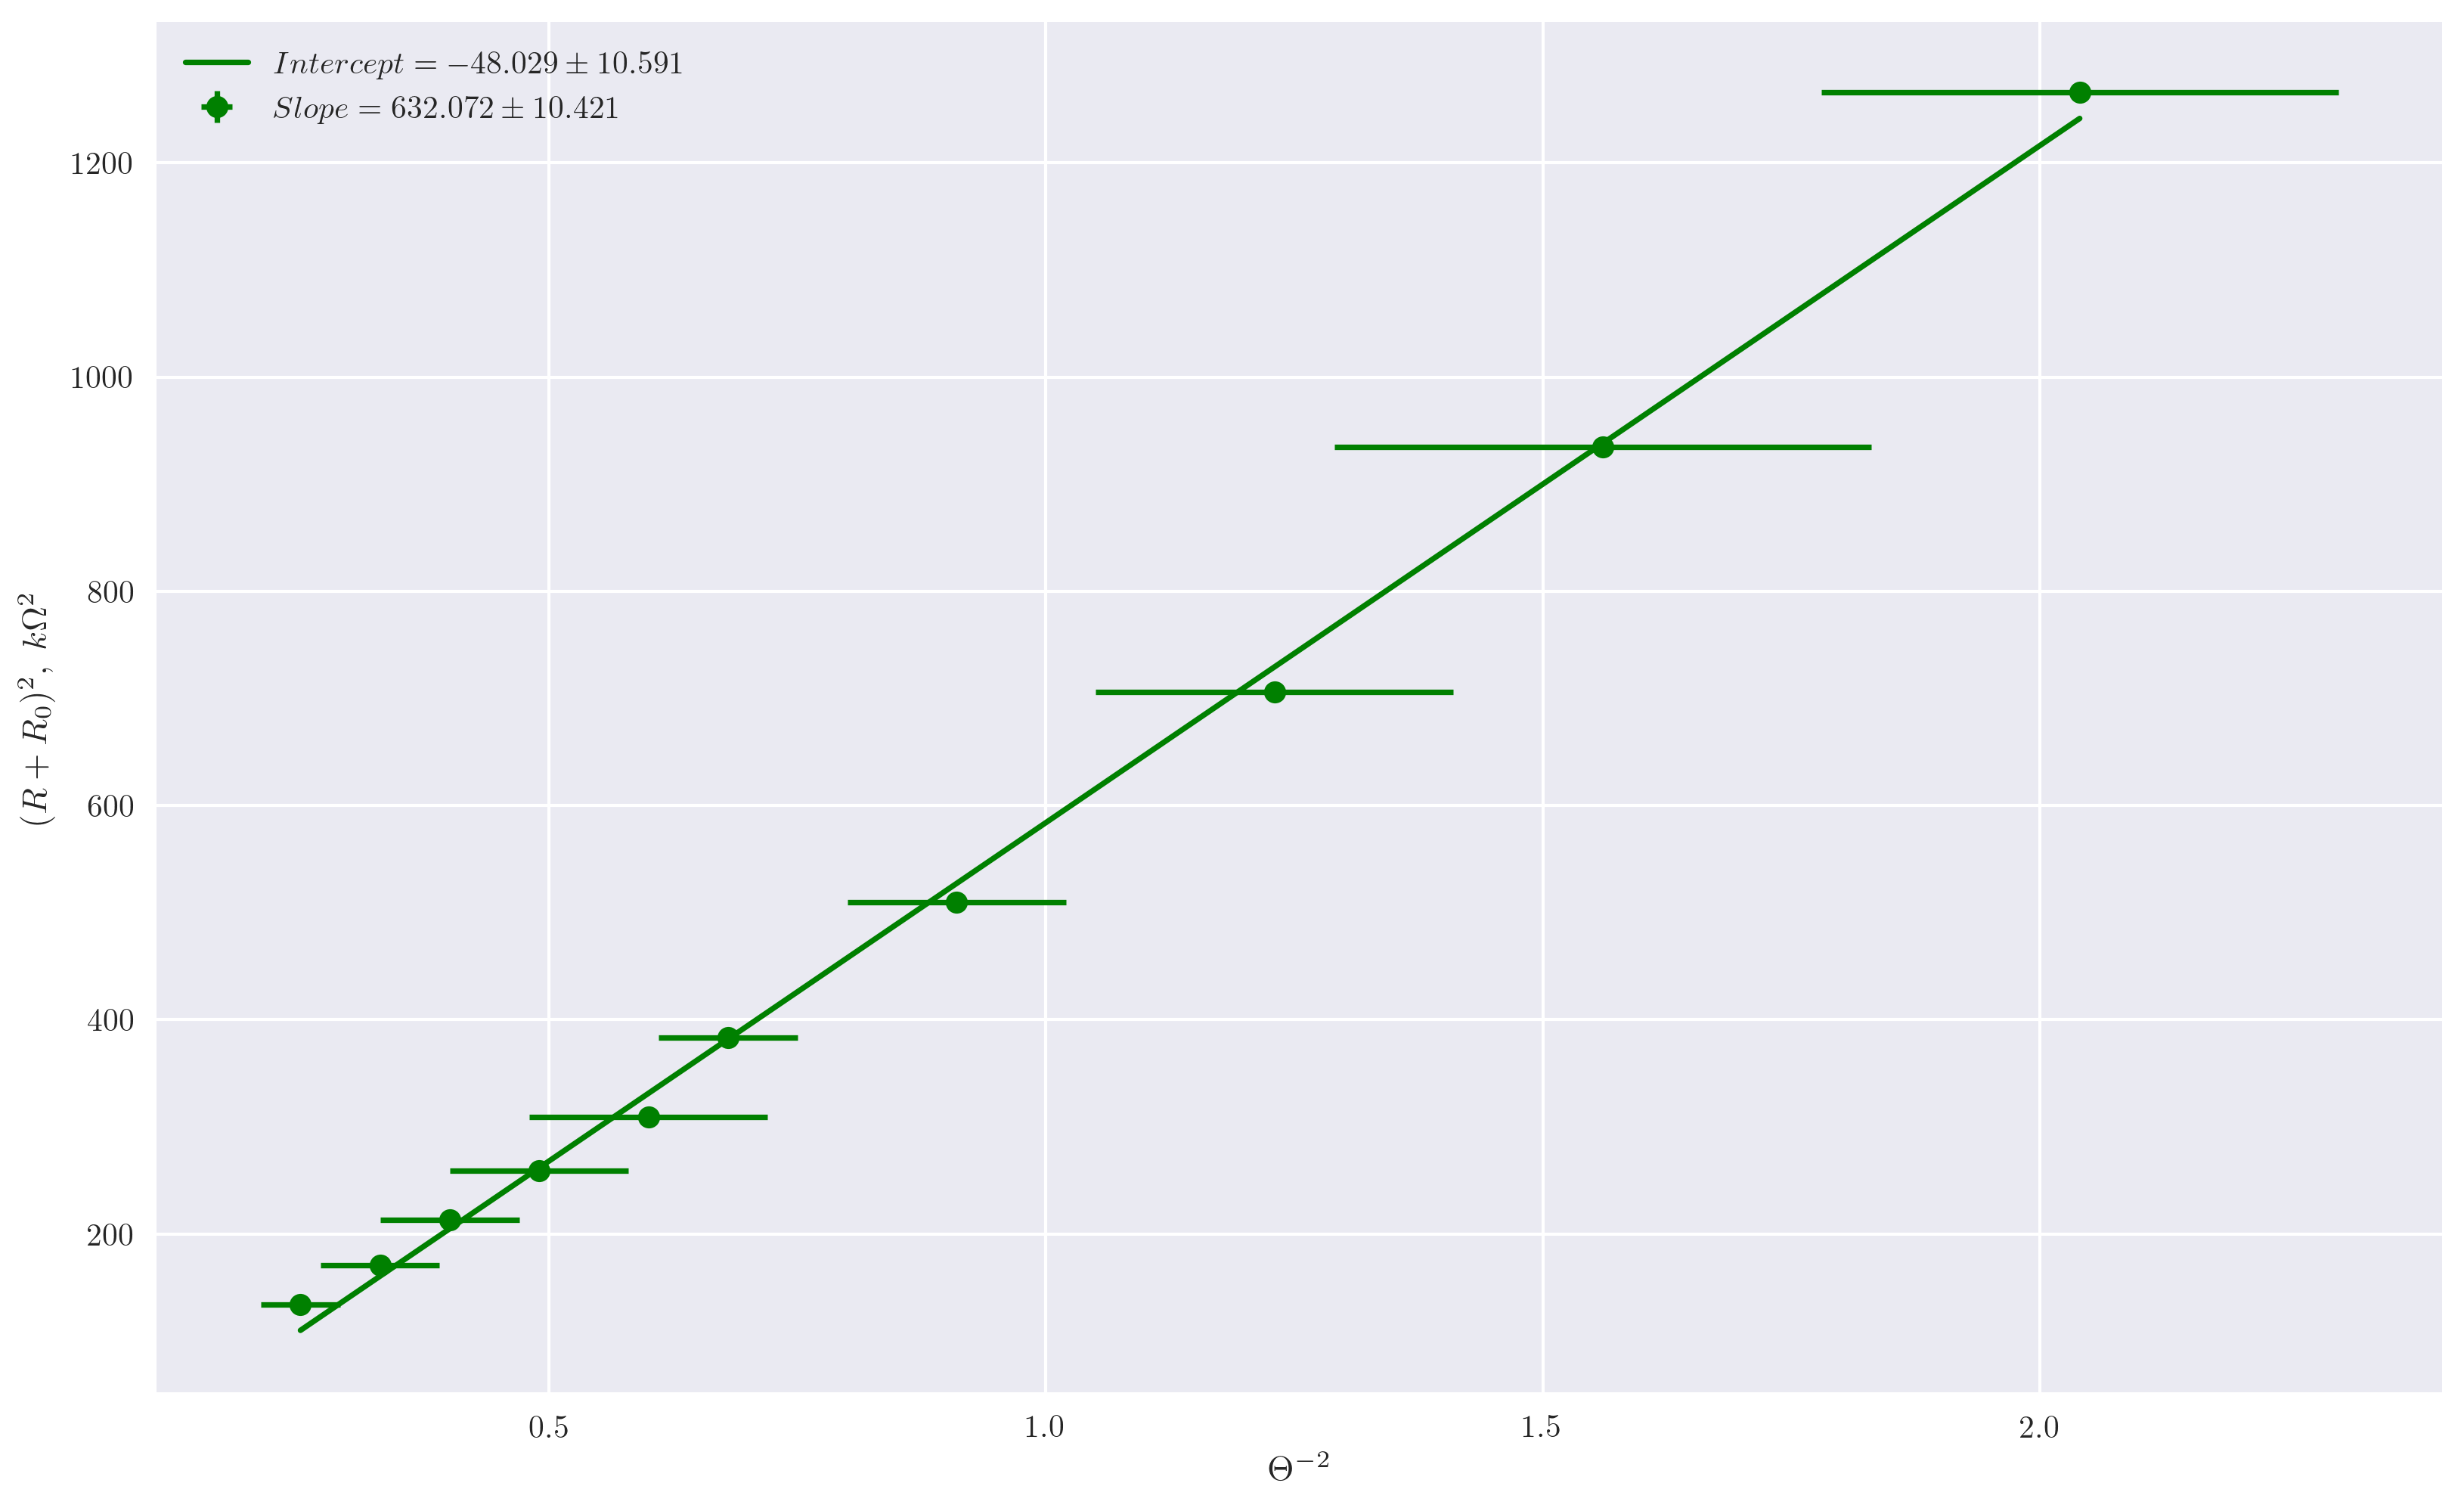

In [7]:
sl.linplot(dataxR2['$\Theta^{-2}$'], dataxR2['$(R+R_0)^2,\ кОм^2$'], xerr=dataxR2['$\Delta\Theta^{-2}$'],
          yerr=dataxR2['$\Delta(R+R_0)^2,\ кОм^2$'], xlabel='$\Theta^{-2}$', ylabel='$(R+R_0)^2,\ k\Omega^2$')

Из графика угловой коэффициент $k=(630\pm10)\ кОм \Rightarrow R_{кр}=\dfrac{\sqrt{k}}{2\pi}-R_0=(3.4\pm0.8)\ кОм$

## Часть 2

Снимем зависимость отброса зайчика при замыкании ключа от сопротивления в диапазоне $(3-10)R_{кр}$

In [2]:
datalR = pd.read_csv('datalR.tsv', delimiter='\t')
datalR['$(R+R_0)^{-1},\ кОм^{-1}$'] = round(1/(0.58+datalR.iloc[:,1]), 3)
datalR

,"$l,\ см$","$R,\ кОм$","$(R+R_0)^{-1},\ кОм^{-1}$"
0,18.2,50.0,0.020
1,17.7,40.0,0.025
2,17.1,30.0,0.033
3,15.8,20.0,0.049
4,14.2,13.0,0.074
5,12.7,9.0,0.104
6,11.5,7.0,0.132
7,10.6,6.0,0.152
8,8.9,4.0,0.218
9,8.6,3.5,0.245


$l_1 = (20\pm0.3)\ см$ - при разомкнутой внешней цепи $\Rightarrow l_0 = l_1 e^{\Theta_0/4}=(20.5\pm0.3)\ см$ - амплитуда без затухания

При критическом сопротивлении $l=l_0/e=(7.5\pm0.1)\ см$

Построим график

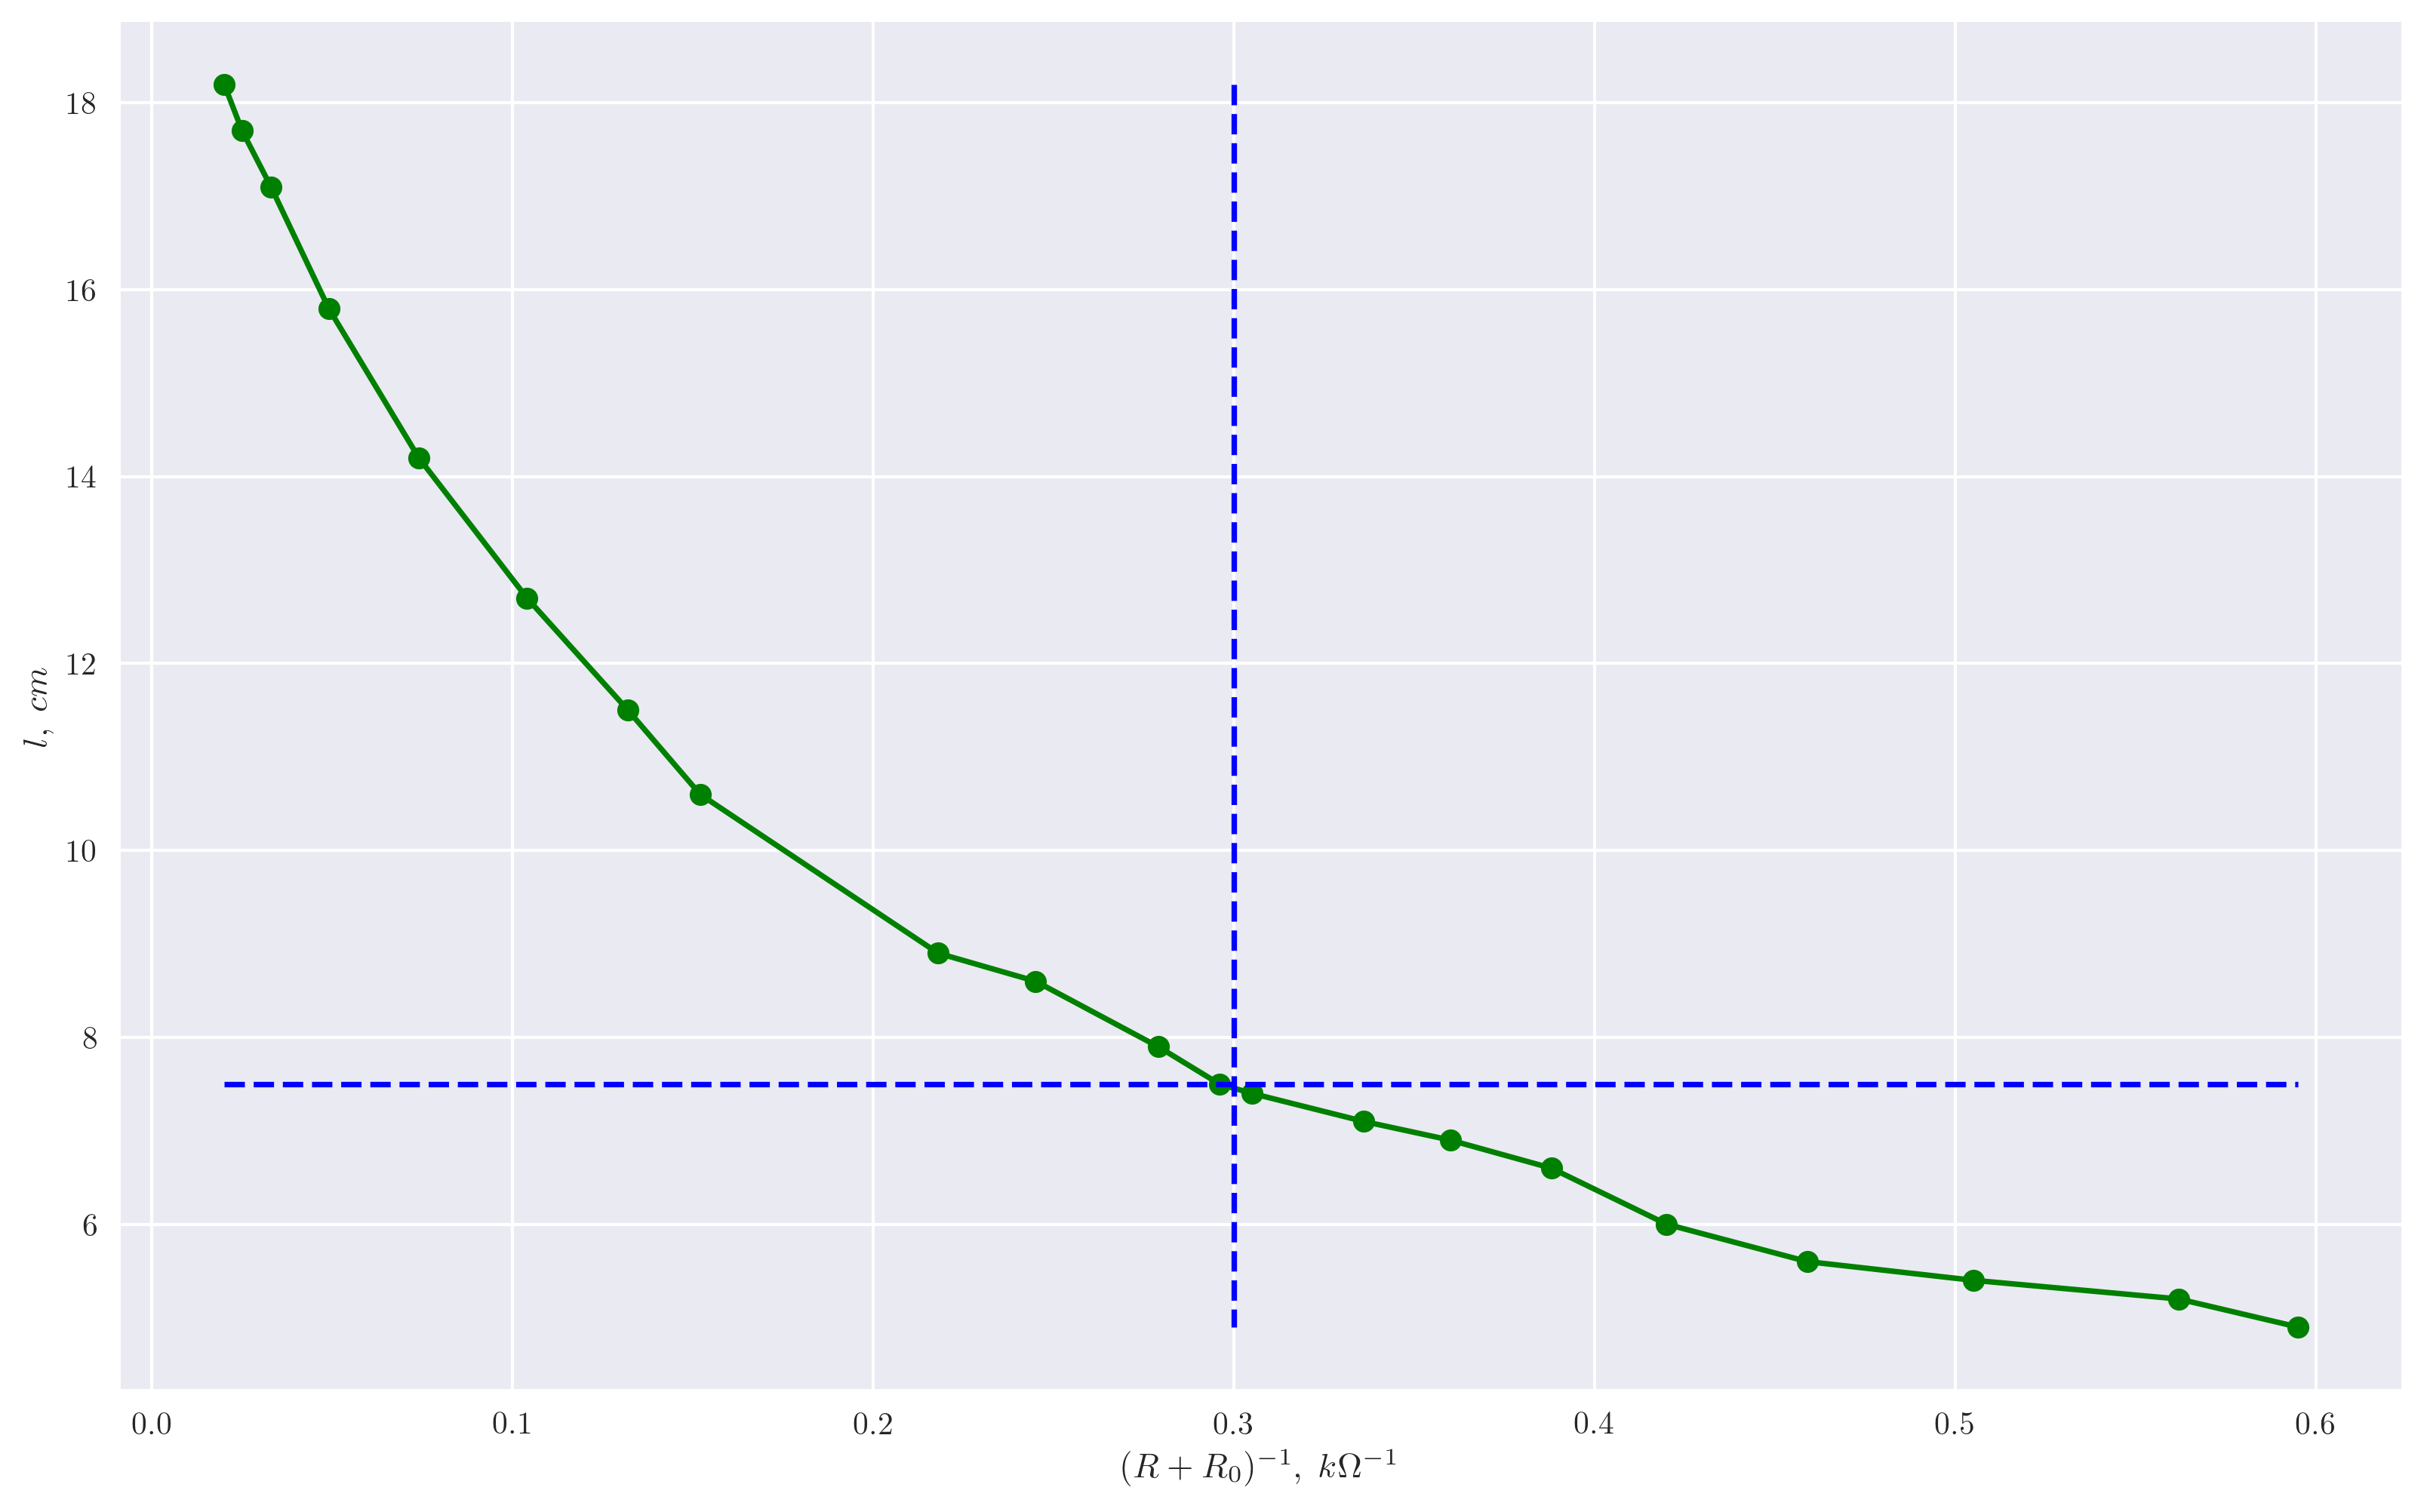

In [14]:
x = datalR.iloc[:,2]
y = datalR.iloc[:,0]
xlabel='$(R+R_0)^{-1},\ k\Omega^{-1}$'
ylabel='$l,\ cm$'
plt.figure(figsize=(13, 8), dpi=300)
func = interp1d(x, y, kind='cubic')
plt.plot(x, func(x), 'g-')
plt.plot(x, y, 'go')
plt.plot(x, x*0+7.5, 'b--')
plt.plot(y*0+0.3, y, 'b--')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

Из графика $(R_{кр}+R_0)^{-1}=(0.30\pm0.01)\ кОм^{-1}) \Rightarrow R_{кр} = (2.8\pm0.1)\ Ом$

- Емкость конденсатора $C=2\ мкФ$
- Коэффициент делителя $\alpha=1/20$

Рассчитаем баллистическую постоянную:
$$ C_{Q_{кр}}=2a\alpha\dfrac{U_0 C}{l} = (3.93\pm0.04)\cdot 10^{-6}\ Кл = (3.93\pm0.04)\cdot 10^{-9}\ \dfrac{Кл}{мм/м}$$

Время релаксации $t=R_0C=1.16\ мс \ll T_0 = 7\ с$

## Выводы

В ходе эксперимента были определены характеристики гальванометра, проверена линейность его шкалы и найдено критическое сопротивление цепи тремя различными способами. Все 3 полученных значения $R_{кр}$ совпадают друг с другом в пределах погрешности.